In [13]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("Autoencoder 2017 Dataset.csv")
df = df[df["Fraud"].notnull()].copy()
df = df.fillna(0)

df2 = df.iloc[:-5,:].copy()
df2 = df2.iloc[20:,:].copy()
X = df2.iloc[:,1:].copy()
y = df2.iloc[:,0]
validation_set_neg = df.iloc[:20,1:].copy()
validation_set_pos = df.iloc[-5:,1:].copy()

1.0 0.2


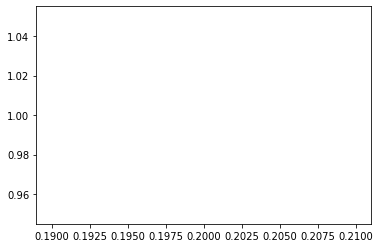

In [29]:
import warnings
warnings.filterwarnings('ignore')
pres = []
recall = []
for i in np.arange(0.0001, 0.01, 0.0001):
    model = lm.LogisticRegression(C = i, class_weight = "balanced")
    model.fit(X, y)
    pred_n = model.predict(validation_set_neg)
    pred_p = model.predict(validation_set_pos)
    if sum(pred_p) + sum(pred_n) > 0:
        pres.append(sum(pred_p)/(sum(pred_p) + sum(pred_n)))
        recall.append(sum(pred_p)/len(pred_p))
total = [pres[i] + recall[i] for i in range(len(pres))]
print(pres[np.argmax(total)], recall[np.argmax(total)])
plt.plot(recall, pres)

0.3333333333333333 0.2


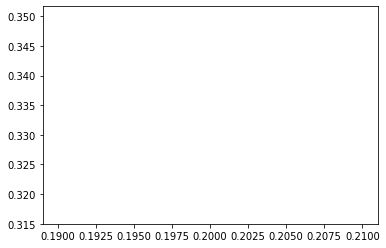

In [30]:
pres = []
recall = []
for i in np.arange(0, 1, 0.001):
    model = lm.RidgeClassifier(alpha = i, class_weight = "balanced")
    model.fit(X, y)
    pred_n = model.predict(validation_set_neg)
    pred_p = model.predict(validation_set_pos)
    if sum(pred_p) + sum(pred_n) > 0:
        pres.append(sum(pred_p)/(sum(pred_p) + sum(pred_n)))
        recall.append(sum(pred_p)/len(pred_p))
total = [pres[i] + recall[i] for i in range(len(pres))]
print(pres[np.argmax(total)], recall[np.argmax(total)])
plt.plot(recall, pres)